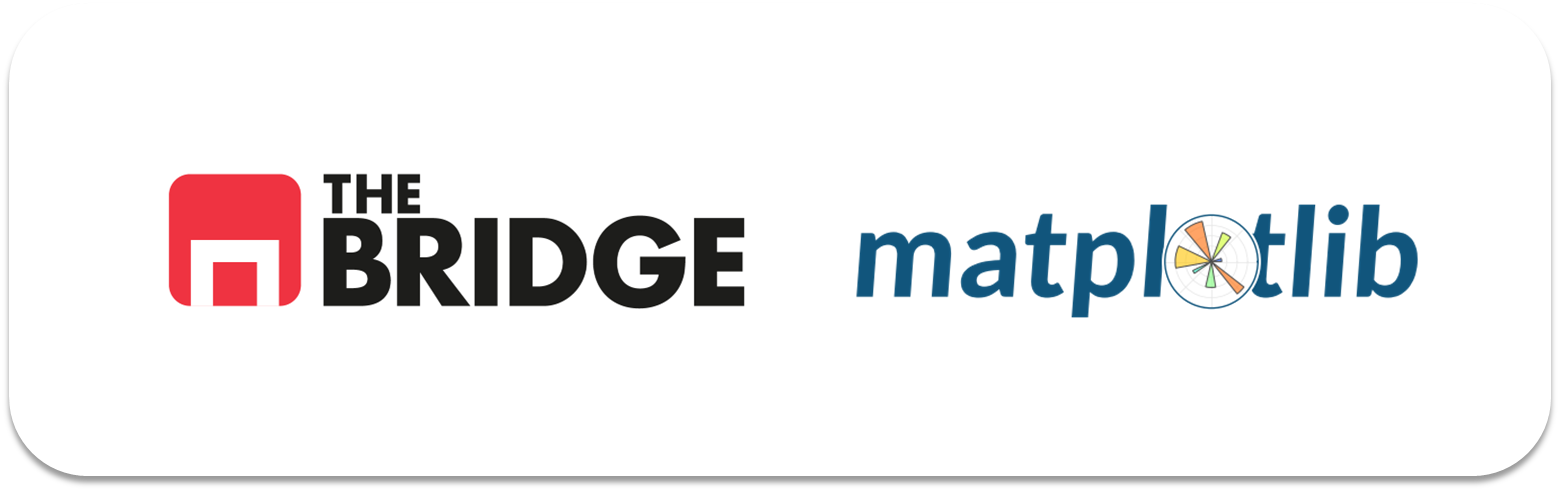

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import os
import re

from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Matplotlib is building the font cache; this may take a moment.


In [2]:

# Bradley Hand Itc en Legionfonts.com 
# https://legionfonts.com/fonts/bradley-hand-itc
# https://stackoverflow.com/questions/26085867/matplotlib-font-not-found

# De la web de legionfonts me he descargado la fuente que quiero, y he 
# llevado el fichero .ttf a a la carpeta que aparece a continuación

# Después hay que eliminar el caché
# The file fontList.cache is located at your Userfolder --> .matplotlib/fontList.cache, 
# for Windows that would normally be C:\Users\yourUsername\.matplotlib\fontList.cache

import matplotlib
import matplotlib.font_manager

matplotlib.font_manager.findfont('Bradley Hand ITC')

'C:\\Users\\Lander\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\Bradley Hand ITC.ttf'

In [3]:
print(matplotlib.get_cachedir())

C:\Users\Lander\.matplotlib


In [4]:
# Voy a preguntar si lo de arriba es un directorio
os.path.isdir(r'C:\Users\Lander\.matplotlib')

True

In [5]:
# Acceder a una ruta desde Python
mi_generador = os.walk(r'C:\Users\Lander\.matplotlib')

In [6]:
next(mi_generador)

('C:\\Users\\Lander\\.matplotlib', [], ['fontlist-v390.json'])

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta './data/california_cities.csv'. Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [7]:
def split_by_uppercase(text) -> str:
    '''
    Uses regular expressions to find uppercase letters, split a string at those points,
    and return a new string separated by spaces.
    
    Parameters:
    ----------
    text : str
        Text to split.
        
    Returns:
    -------
    str
        The modified string with spaces inserted before each uppercase letter.
    '''
    strings = re.findall(r'[A-Z][^A-Z]*', text)
    return ' '.join(strings)

In [8]:
california_cities = pd.read_csv('./data/california_cities.csv',
                                index_col = 0)
display(california_cities)
display(california_cities.info())

# Deshacerme de las filas con nulos y poner más bonita la columna "city"
california_cities.dropna(axis = 0, how = 'any', ignore_index = True, inplace = True)
california_cities['city'] = california_cities['city'].apply(split_by_uppercase)
california_cities.info()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                427 non-null    object 
 1   latd                427 non-null    float64
 2   longd               427 non-null    float64
 3   elevation_m         427 non-null    float64
 4   elevation_ft        427 non-null    float64
 5   population_total    427 non-null    int64  
 6   area_total_sq_mi    427 non-null    float64
 7   area_land_sq_mi     427 non-null    float64
 8   area_water_sq_mi    427 non-null    float64
 9   area_total_km2      427 non-null    float64
 10  area_land_km2       427 non-null    float64
 11  area_water_km2      427 non-null    float64
 12  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 43.5+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a 'center'). (Colores: azul, gris, rojo, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Los Angeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
1,San Diego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68
2,Sacramento,38.555556,-121.468889,9.0,30.0,466488,100.105,97.915,2.190,259.273,253.600,5.673,2.19
3,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92
4,Santa Ana,33.740833,-117.881389,35.0,115.0,324528,27.518,27.270,0.248,71.271,70.628,0.643,0.90


Text(0.5, 1.0, 'Ciudades más pobladas de California')

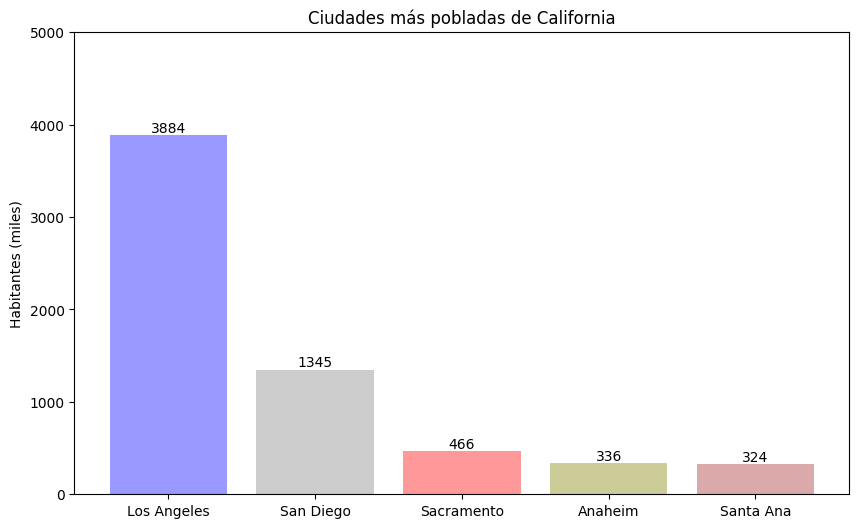

In [9]:
# ######### Apartado 1 #########
# Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para 
# centrarlos se necesita poner el argumento `ha` a 'center'). (Colores: azul, gris, rojo, aceituna, marrón, con trasparencia)

# DataFrame reducido
top_population = california_cities.sort_values(by='population_total', ascending=False).head(5).reset_index(drop=True).copy()
display(top_population)
   
colores = ['blue', 'gray', 'red', 'olive', 'brown']
plt.figure(figsize=(10, 6))
bars = plt.bar(top_population['city'], top_population['population_total']/1000,
       color = colores, 
       alpha = 0.4)

fontdict = {'ha' : 'center',
            'va' : 'bottom'}
for bar in bars:
    y_val = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2.0, 
             y = y_val, 
             s = int(y_val),
             **fontdict)

plt.ylabel('Habitantes (miles)')
plt.ylim(0, 5000)
plt.title('Ciudades más pobladas de California')

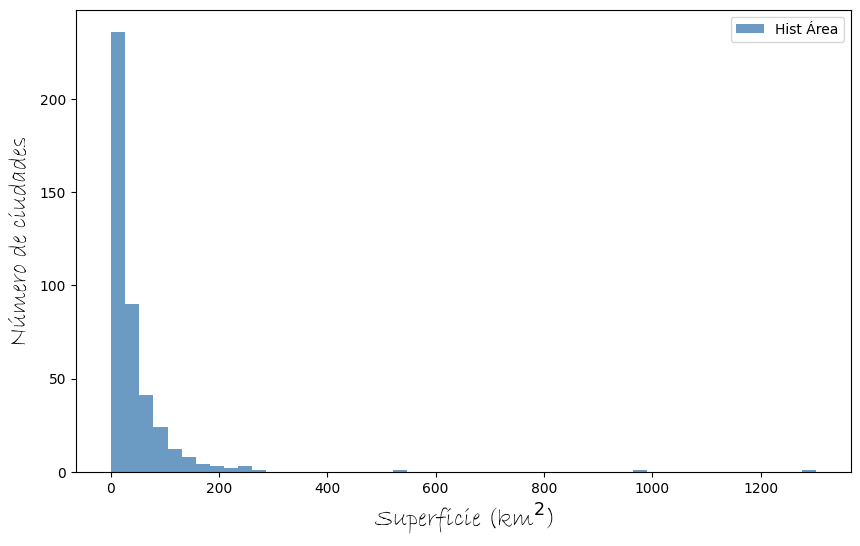

In [10]:
# ######### Apartado 2 #########
# Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

plt.figure(figsize = (10, 6))

histogram = plt.hist(california_cities['area_total_km2'].to_list(),
                     bins = 50,
                     alpha = 0.8,
                     color = 'steelblue',
                     label = 'Hist Área'
                     )

kwargs = {'fontfamily' : 'Bradley Hand ITC',
          'fontsize' : 18}

plt.xlabel('Superficie (km$^{2}$)', **kwargs)
plt.ylabel('Número de ciudades', **kwargs)
plt.legend(loc = 'upper right',
           frameon = True)

Text(0, 0.5, 'Población (miles de habitantes)')

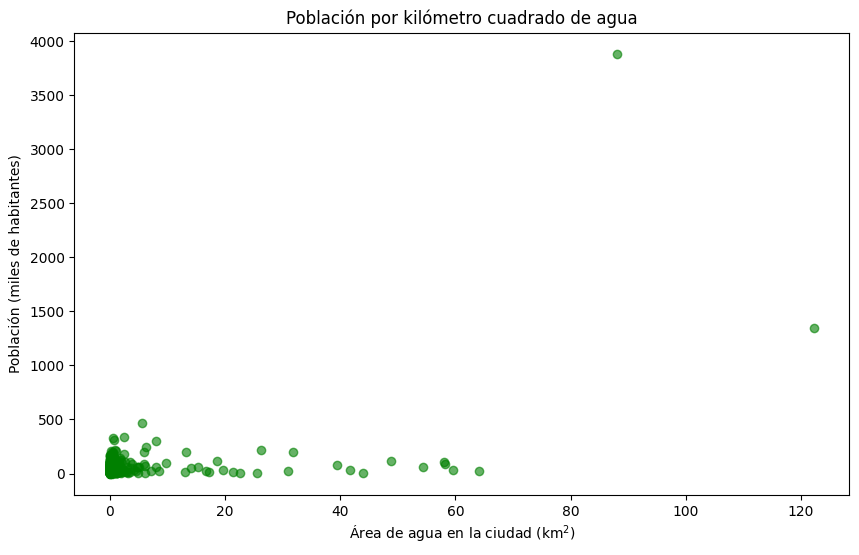

In [11]:
# ######### Apartado 3 #########
# El scatter de área de agua de un ciudad con su poblacion.

plt.figure(figsize = (10, 6))
kwargs = {'color' : 'green',
          'alpha' : 0.6,
          'marker' : 'o'}
plt.scatter(california_cities['area_water_km2'],
            california_cities['population_total']/1000,
            **kwargs)

plt.title('Población por kilómetro cuadrado de agua')
plt.xlabel('Área de agua en la ciudad (km$^{2}$)')
plt.ylabel('Población (miles de habitantes)')

Text(0.5, 0, 'Altitud (m)')

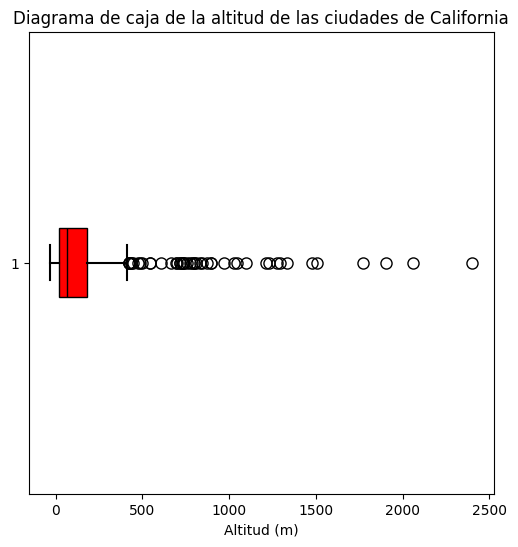

In [12]:
# ######### Apartado 4 #########
# El boxplot de la altura de las ciudades.

plt.figure(figsize=(6, 6))

plt.boxplot(california_cities['elevation_m'], 
            vert = False,
            patch_artist = True, 
            boxprops = dict(facecolor='red', color='black'),
            medianprops = dict(color='black'),
            whiskerprops = dict(color='black', linewidth=1.5),
            capprops = dict(color='black', linewidth=1.5),
            flierprops = dict(markersize=8))

# Configuraciones adicionales
plt.title('Diagrama de caja de la altitud de las ciudades de California')
plt.xlabel('Altitud (m)')


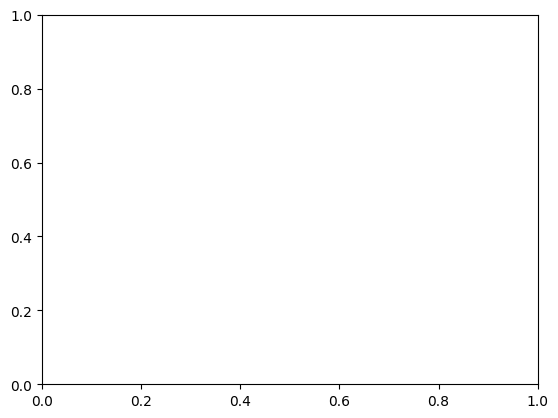

In [13]:
# pyplot es MATLAB, y si tenemos un código en este leguaje podemos
# recuperar sus objetos para seguir trabajando

fig = plt.gcf()
ax = plt.gca()

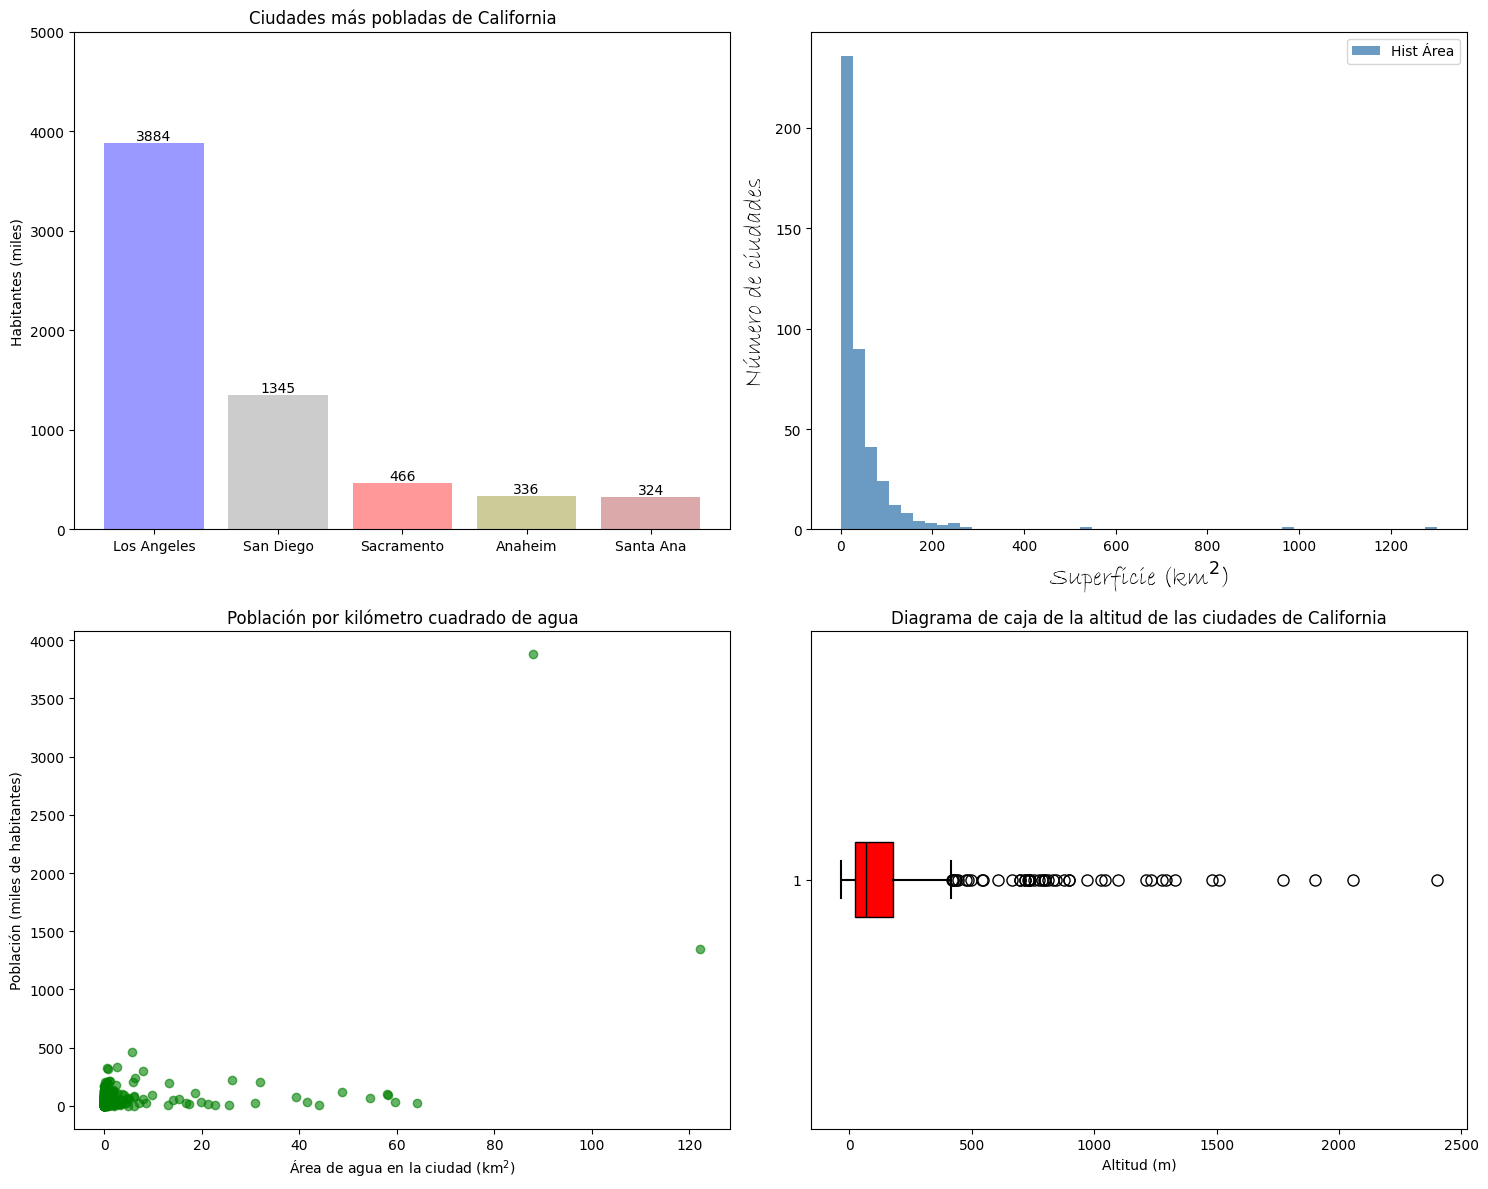

In [14]:
# Juntar TODAS las gráficas en una única

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# ######################## Apartado 1 ########################

# DataFrame reducido
top_population = california_cities.sort_values(by='population_total', ascending=False).head(5).reset_index(drop=True).copy()
   
colores = ['blue', 'gray', 'red', 'olive', 'brown']
axs[0, 0].bar(top_population['city'], top_population['population_total']/1000,
              color = colores,
              alpha=0.4)

fontdict = {'ha' : 'center', 
            'va' : 'bottom'}
for bar in axs[0, 0].patches:   # lo mismo que si lo hubiera guardado en la variable bars = plt.bar(...)
    y_val = bar.get_height()
    axs[0, 0].text(x=bar.get_x() + bar.get_width()/2.0,
                   y=y_val,
                   s=int(y_val),
                   **fontdict)

axs[0, 0].set_ylabel('Habitantes (miles)')
axs[0, 0].set_ylim(0, 5000)
axs[0, 0].set_title('Ciudades más pobladas de California')

# ######################## Apartado 2 ########################

axs[0, 1].hist(california_cities['area_total_km2'].to_list(),
               bins=50,
               alpha=0.8,
               color='steelblue',
               label='Hist Área')

kwargs = {'fontfamily' : 'Bradley Hand itc',
          'fontsize' : 18}
axs[0, 1].set_xlabel('Superficie (km$^{2}$)', **kwargs)
axs[0, 1].set_ylabel('Número de ciudades', **kwargs)
axs[0, 1].legend(loc = 'upper right', 
                 frameon = True)

# ######################## Apartado 3 ########################

kwargs = {'color' : 'green',
          'alpha' : 0.6,
          'marker' : 'o'}
axs[1, 0].scatter(california_cities['area_water_km2'],
                  california_cities['population_total']/1000,
                  **kwargs)

axs[1,0].set_title('Población por kilómetro cuadrado de agua')
axs[1, 0].set_xlabel('Área de agua en la ciudad (km$^{2}$)')
axs[1, 0].set_ylabel('Población (miles de habitantes)')


# ######################## Apartado 4 ########################

axs[1, 1].boxplot(california_cities['elevation_m'],
                  vert = False,
                  patch_artist = True,
                  boxprops = dict(facecolor='red', color='black'),
                  medianprops = dict(color='black'),
                  whiskerprops = dict(color='black', linewidth=1.5),
                  capprops = dict(color='black', linewidth=1.5),
                  flierprops = dict(markersize=8))

axs[1, 1].set_title('Diagrama de caja de la altitud de las ciudades de California')
axs[1, 1].set_xlabel('Altitud (m)')

plt.tight_layout()  # Ajustar el espaciado entre subplots

plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [15]:
fig.savefig('./practica_obligatoria_LANDER.PNG')    # Guardarla en un archivo


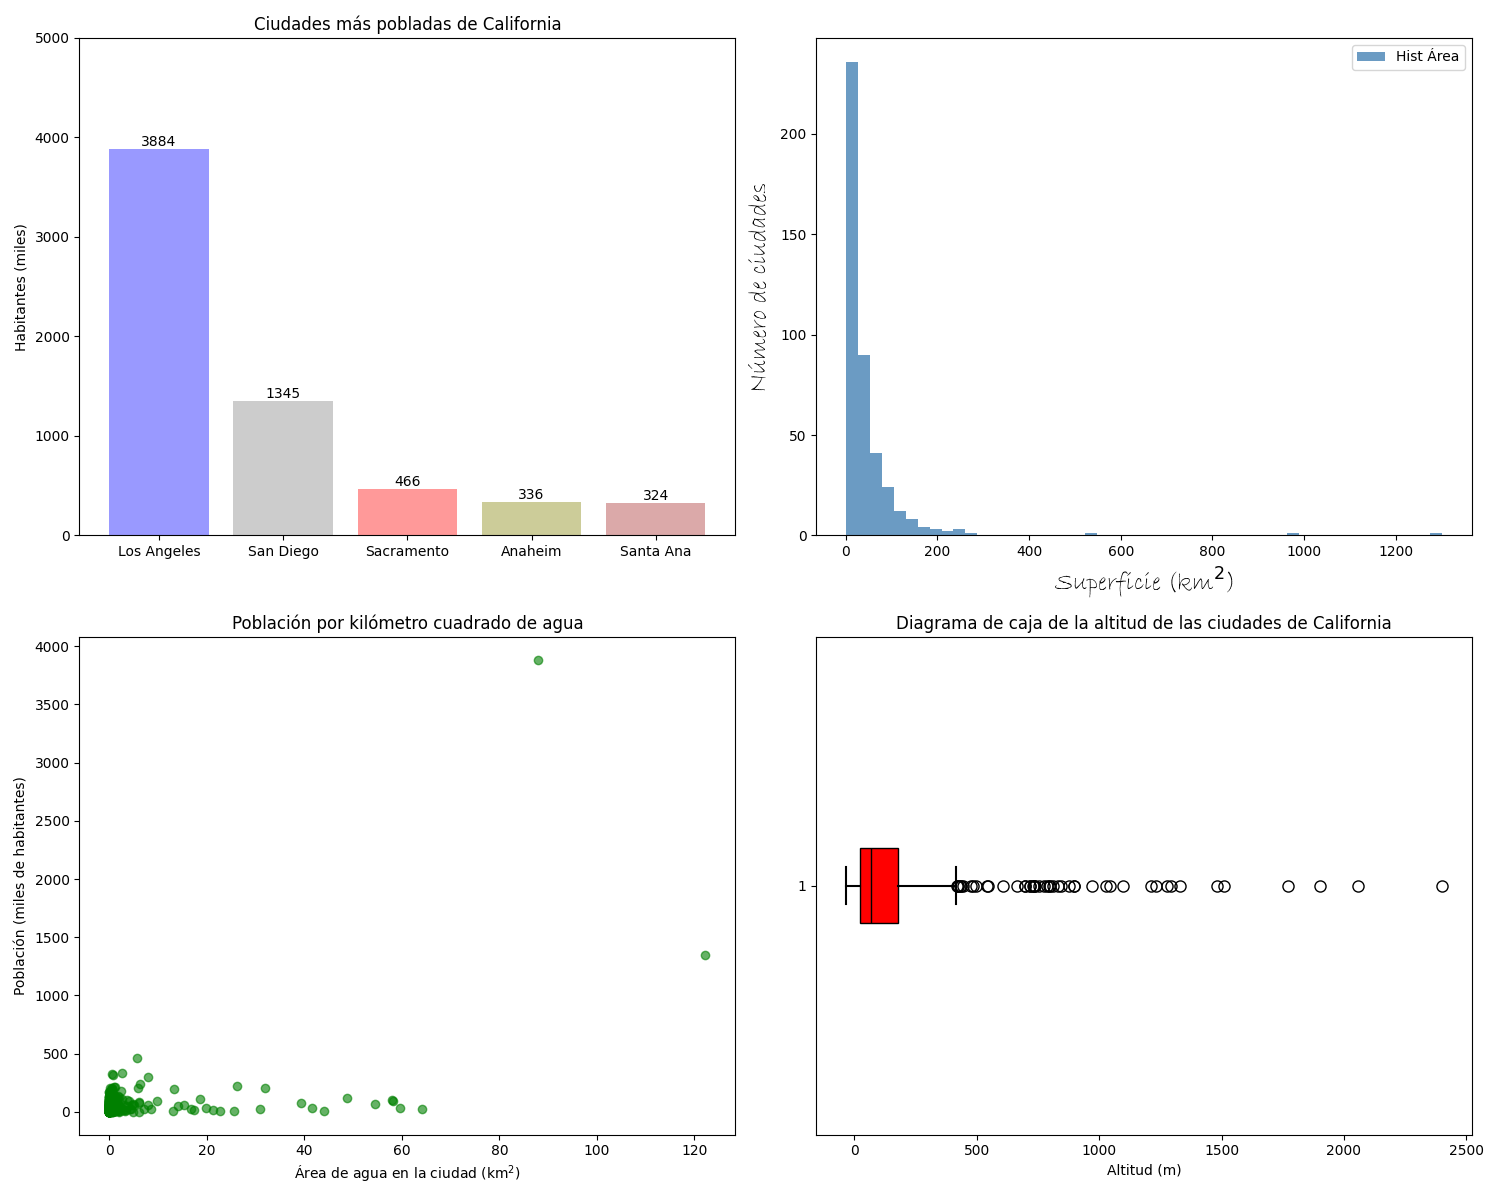

In [16]:
Image('./practica_obligatoria_LANDER.png')      # Cargarla de un archivo